In [42]:
# %matplotlib widget
import json
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import fastf1
import fastf1.core
import fastf1.plotting
import logging

import warnings
warnings.filterwarnings('ignore')

fastf1.logger.set_log_level(level=logging.ERROR)

In [43]:
session = fastf1.get_session(2024, "Brazil", "Q")
session.load()

# Throttle Pct

In [44]:
drivers = session.drivers

metrics_df = pd.DataFrame([], columns=['driver', 'track', 'metric', 'value'])

driver = drivers[0]

telemetry = session.laps.pick_drivers(driver).pick_fastest().get_telemetry()

telemetry = telemetry[telemetry['Source'] == 'pos']

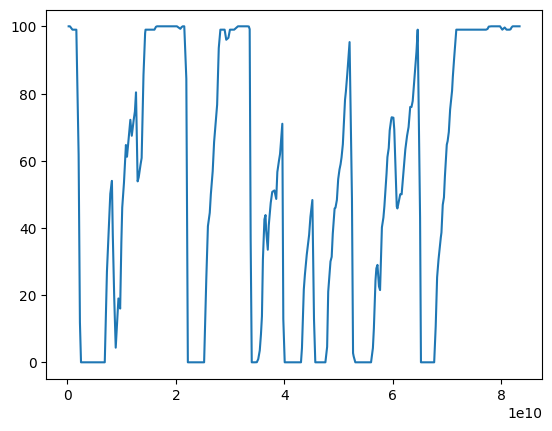

In [45]:
fig, ax = plt.subplots()

ax.plot(telemetry["Time"], telemetry["Throttle"])

plt.show()

In [46]:
event_schedule = fastf1.get_event_schedule(2024, include_testing=False)

rounds = event_schedule['RoundNumber']

print(session)

2024 Season Round 21: São Paulo Grand Prix - Qualifying


In [47]:

for round_num in rounds:
    session = fastf1.get_session(2024, round_num, 'Q')
    session.load()
    drivers = session.drivers
    session_name = session.event.Location

    print(f"Session {session_name}")

    for driver in drivers:
        lap_data = session.laps.pick_drivers(driver).pick_fastest()
        if lap_data is None:
            print(f"No lap data for driver {driver} - Skipping")
            continue

        print(f"generating metrics for {driver}")

        try:
            telemetry = lap_data.get_telemetry()
        except Exception as e:
            print(f"Error trying to get telemetry for driver {driver} - Skipping")
            continue

        n_datapoints = len(telemetry['Throttle'])
        n_max_throttle = len(telemetry[telemetry['Throttle'] >= 95])
        throttle_pct = n_max_throttle / n_datapoints * 100
        data = pd.DataFrame({
            "driver": [driver],
            "track": [session_name],
            "metric": ["throttle_pct"],
            "value": [throttle_pct]
        }, index = [0])
        metrics_df = pd.concat([metrics_df, data], ignore_index=True)

metrics_df.sort_values(by = 'value')


Session Sakhir
generating metrics for 1
generating metrics for 16
generating metrics for 63
generating metrics for 55
generating metrics for 11
generating metrics for 14
generating metrics for 4
generating metrics for 81
generating metrics for 44
generating metrics for 27
generating metrics for 22
generating metrics for 18
generating metrics for 23
generating metrics for 3
generating metrics for 20
generating metrics for 77
generating metrics for 24
generating metrics for 2
generating metrics for 31
generating metrics for 10
Session Jeddah
generating metrics for 1
generating metrics for 16
generating metrics for 11
generating metrics for 14
generating metrics for 81
generating metrics for 4
generating metrics for 63
generating metrics for 44
generating metrics for 22
generating metrics for 18
generating metrics for 38
generating metrics for 23
generating metrics for 20
generating metrics for 3
generating metrics for 27
generating metrics for 77
generating metrics for 31
generating metr

,driver,track,metric,value
411,43,São Paulo,throttle_pct,21.994135
412,27,São Paulo,throttle_pct,23.021583
407,55,São Paulo,throttle_pct,24.522761
410,50,São Paulo,throttle_pct,24.964539
413,24,São Paulo,throttle_pct,25.852273
...,...,...,...,...
295,81,Monza,throttle_pct,76.112026
24,81,Jeddah,throttle_pct,76.161919
301,11,Monza,throttle_pct,76.190476
20,1,Jeddah,throttle_pct,76.979472


<Axes: title={'center': 'value'}, xlabel='[track]'>

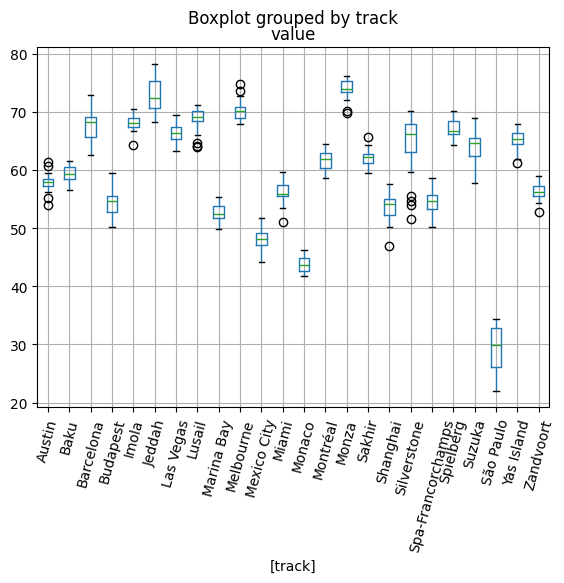

In [48]:
throttle_series = metrics_df[(metrics_df['metric'] == 'throttle_pct')]

throttle_series.boxplot(by='track', rot=75)

# fig, ax = plt.subplots()

# ax.boxplot(x = 'track', y = 'value', data = throttle_series)

# plt.show()

In [49]:
metrics_df[['track', 'metric', 'value']].groupby(['track', 'metric']).mean().sort_values(by = 'value')

,,value
track,metric,
São Paulo,throttle_pct,29.258668
Monaco,throttle_pct,43.837823
Mexico City,throttle_pct,48.167745
Marina Bay,throttle_pct,52.784183
Shanghai,throttle_pct,53.717273
Budapest,throttle_pct,54.352373
Spa-Francorchamps,throttle_pct,54.601253
Miami,throttle_pct,56.102001
Zandvoort,throttle_pct,56.282800


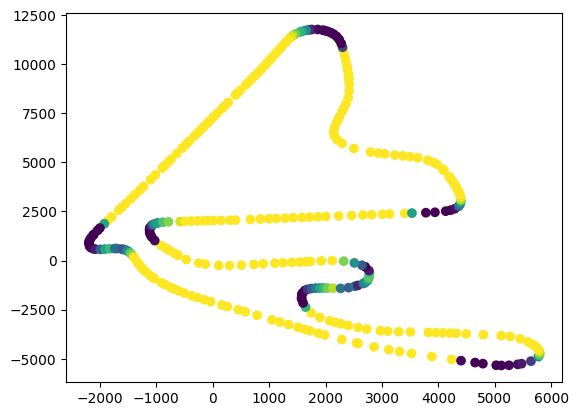

In [50]:
drivers = session.drivers

metrics_df = pd.DataFrame([], columns=['driver', 'track', 'metric', 'value'])

driver = drivers[0]

telemetry = session.laps.pick_drivers(driver).pick_fastest().get_telemetry()

telemetry = telemetry[telemetry['Source'] == 'pos']

telemetry

fig, ax = plt.subplots()

ax.scatter(x = telemetry['X'], y = telemetry['Y'], c = telemetry['Throttle'])

plt.show()